# Assignment 1 - COMP 472


#### Teammates:
Tabish Ashfaq - 26752624

Jan Libera - 27728085

## Task 0
Remove document identifier, and also the topic label, which you don't need. 

In [108]:
from __future__ import division
from codecs import open

def read_documents(doc_file):
    docs = []
    labels = []
    with open(doc_file, encoding='utf-8') as f:
        for line in f:
            words = line.strip().split()
            docs.append(words[3:])
            labels.append(words[1])
    return docs, labels
    
# Reads provide doc file.
# Args --> doc_file (str): Path to given data file.
# Returns --> Tuple of lists (words, labels) 
 

In [109]:
all_docs, all_labels = read_documents("sample-text.txt")

split_point = int(0.80*len(all_docs))
train_docs = all_docs[:split_point]
train_labels = all_labels[:split_point]
eval_docs = all_docs[split_point:]
eval_labels = all_labels[split_point:]

In [110]:
result = [[i,' '.join(j)] for i,j in zip(all_labels, all_docs)]

## Task 1
Plot the distribution of the number of the instances in each class (books, camera, dvd, health, music, or software).


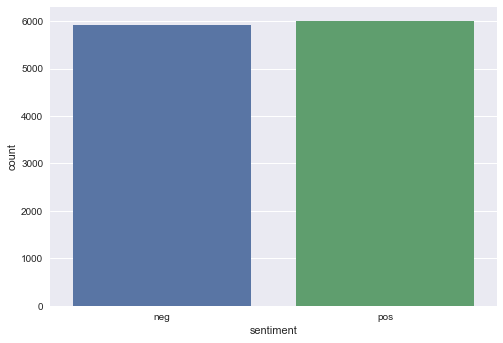

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame(result, columns=['sentiment','text'])

plt.style.use('seaborn')

sns.countplot('sentiment', data = data)

In [112]:
print(data)

      sentiment                                               text
0           neg  i bought this album because i loved the title ...
1           neg  i was misled and thought i was buying the enti...
2           neg  i have introduced many of my ell , high school...
3           pos  anything you purchase in the left behind serie...
4           pos  i loved these movies , and i cant wiat for the...
...         ...                                                ...
11909       neg  the story here dose n't matter . the main char...
11910       pos  i liked everything about this product except i...
11911       pos  this flash is the perfect back-up for a studio...
11912       neg  i had boughten this as a gift which turned out...
11913       neg  the pedometer arrive held prisoner in a diffic...

[11914 rows x 2 columns]


In [113]:
print ("X_train: ", len(train_docs))
print("X_test: ", len(eval_docs))
print("y_train: ", len(train_labels))
print("y_test: ", len(eval_labels))

X_train:  9531
X_test:  2383
y_train:  9531
y_test:  2383


In [114]:
#for counting frequently occurrence of negative and positive words.
from collections import Counter
import re

count1 = Counter(" ".join(data[data['sentiment']=='pos']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "positive words", 1 : "count"})
count2 = Counter(" ".join(data[data['sentiment']=='neg']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "negative words", 1 : "count_"})

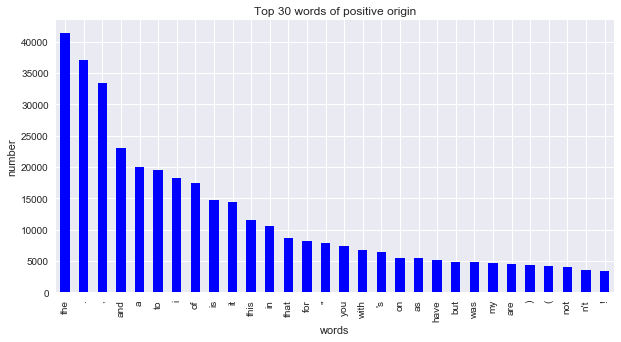

In [115]:

data1.plot.bar(legend = False, color = 'blue',figsize = (10,5))
y_pos = np.arange(len(data1["positive words"]))
plt.xticks(y_pos, data1["positive words"])
plt.title('Top 30 words of positive origin')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

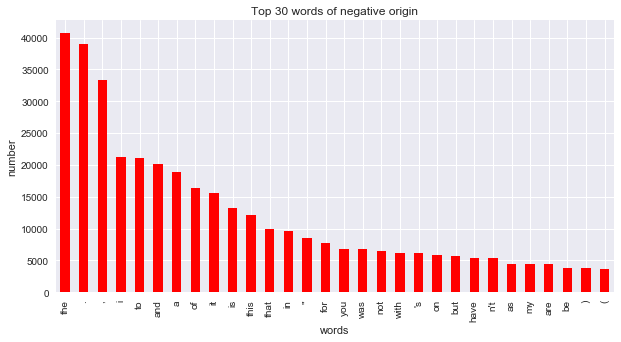

In [116]:
data2.plot.bar(legend = False, color = 'red', figsize = (10,5))
y_pos = np.arange(len(data2["negative words"]))
plt.xticks(y_pos, data2["negative words"])
plt.title('Top 30 words of negative origin')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

## Task 2

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

X = data['text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)

X_test_text = X_test.copy()

#tfidf_vect = TfidfVectorizer()
vectorizer = CountVectorizer(stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

len(vectorizer.get_feature_names())

41893

In [124]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
import csv

# Naive Bayes Classifier
nb = MultinomialNB()

# Base - DT
dtc = DecisionTreeClassifier(criterion='entropy')

#Best DT Grid Search CV
#parameters = {'criterion':["entropy"], 'random_state':range(0,100),'min_samples_split':range(2,20), 'min_impurity_decrease': list(np.linspace(0,1,20))}
# parameters = {'criterion':["entropy"], 'random_state':range(0,100)}
# acc_scorer = make_scorer(accuracy_score)
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring=acc_scorer)
# clf.fit(X_train, y_train)
# best_dt = clf.best_estimator_
# print (clf.best_score_, clf.best_params_)

# Best - DT
best_dt = ExtraTreesClassifier(n_estimators=37, random_state=252)

models = {'Naive Bayes classifier':nb, 'Decision Tree Classifier':dtc, 'Optimal Decision Tree Classifier':best_dt}

In [125]:
def eval_model(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    test_report = classification_report(y_test, y_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pos', 'neg'], index=['pos','neg'])
    
    return test_accuracy, conf_matrix, test_report, y_pred

## Task 3

In [126]:
import csv

test_accuracies = []
confusion_matrices = []
for name, model in models.items():
    test_acc, conf_matrix, test_report, y_pred = eval_model(model) 
    test_accuracies.append(test_acc)
    confusion_matrices.append(conf_matrix)
    with open('{}.txt'.format(name), mode='w') as csvfile:
      writer = csv.writer(csvfile, lineterminator='\n')
      for i in range(X_test.shape[0]):
        writer.writerow([i, y_pred[i]])
      writer.writerow([f'{name} -> Test accuracy - {test_acc*100:.2f}% \nand confusion matrix:\n{conf_matrix}'])
      writer.writerow([test_report])
    
    csvfile.close()

## Task 4


In [140]:
#Getting false predictions. Currently being saved in txt file, but would be better to store in a dataframe and save to disk.
for name, model in models.items():
  #print(model.classes_)
  print("=================\n",name)
  y_pred_probs = model.predict_proba(X_test)
  y_pred = model.predict(X_test)
  rounded_probs = np.around(y_pred_probs)
  y_test_binary = y_test.copy()
  y_test_binary[y_test_binary == 'neg'] = 0
  y_test_binary[y_test_binary == 'pos'] = 1
  false_predictions = np.zeros(y_test.shape)
  false_predictions[y_test != y_pred] = 1
  false_pred_indices = np.where(false_predictions)

  with open('{}-false-predictions.txt'.format(name), mode='w',encoding='utf-8') as outfile:
    writer = csv.writer(outfile, lineterminator='\n')
    writer.writerow(["{} False Predictions".format(name)])
    for ind in false_pred_indices:
      text = np.array(X_test_text)[ind]
      writer.writerow([text, y_pred_probs[ind], np.array(y_test_binary)[ind]])
      #print("prediction: {}, pred_proba: {}, true: {}".format(y_pred[ind][0], y_pred_probs[ind][1], np.array(y_test_binary)[ind][0]))
      pred = pd.DataFrame({
                     'prediction' : y_pred[ind][0],
                     "Predicted probability-['neg','pos']" : [y_pred_probs[ind][1]], 
                     'true':np.array(y_test_binary)[ind][0],
                     'TEXT': np.array(X_test_text)[ind][0] })
      print(pred)

 Naive Bayes classifier
  prediction        Predicted probability-['neg','pos']  true  \
0        pos  [0.07297186522163482, 0.9270281347783665]     0   

                                                TEXT  
0  i love peterson 's guides , but the birds of m...  
 Decision Tree Classifier
  prediction Predicted probability-['neg','pos']  true  \
0        pos                          [0.0, 1.0]     0   

                                                TEXT  
0  i ordered the sony dcr-dvd108 on april 9. i st...  
 Optimal Decision Tree Classifier
  prediction       Predicted probability-['neg','pos']  true  \
0        neg  [0.4594594594594595, 0.5405405405405406]     1   

                                                TEXT  
0  i have been a barry manilow fan since i was a ...  


### References

[1] http://www.cse.chalmers.se/~richajo/dit862/assignment2.html#foot1
[2] https://scikit-learn.org/stable/modules/feature_extraction.html